# ADM - Homework #5

### Dependencies

In [9]:
from functions import *

## 1. Data

Fetching the data from text files

In [4]:
g = Graph()
list_of_graphs = [Graph.a2q, Graph.c2q, Graph.c2a]

In [5]:
g.create_graph(list_of_graphs , ["01/12/2011","05/12/2011"])

Fetching timestamp.csv...
Creating graph!


100%|██████████████████████████████████████████████████████████████████| 63497051/63497051 [02:27<00:00, 431046.06it/s]


Fetched in 185.91 seconds.


What to do to create a graph that contains certain time interval:
1. Instantiate g = Graph()
2. Use g.create_graph(list_of_graphs, "YOUR TIME INTERVAL") to create a graph with edges within a time interval
3. Use g.my_graph to get the graph's adjacency list. Remember that the adjacency list here is actualy a dictionary with keys as nodes and values as neighbors with their connection weight. {u: [[v1,w1], [v2,w2], ...]}

## 2. Implementation of the backend

### Functionality 1 - Get the overall features of the graph

In [ ]:
result_f1 = func1(g, Graph.c2q)

Starting to fetch c2q graph adjacency list...
Fetched c2q graph in 19.82 seconds


100%|██████████| 1655353/1655353 [00:23<00:00, 70607.88it/s] 


###  Functionality 2 - Find the best users! 

In [ ]:
metric = Metric()

In [ ]:
func2(g.my_graph, metric, 1040563, Metric.pagerank)

100%|█████████████████████████████████████████████████████████████████████████| 27338/27338 [00:00<00:00, 71663.40it/s]


5.334465017603853e-05

In [ ]:
func2(g.my_graph, metric, 1040563, Metric.betweenness)

  0%|                                                                           | 16/27338 [03:52<146:52:58, 19.35s/it]

In [ ]:
func2(g.my_graph, metric, 1040563, Metric.closeness_cent)

1.5108325492164687

In [ ]:
func2(g.my_graph, metric, 1040563, Metric.degree_cent)

15

### Functionality 3 - Shortest Ordered Route 

In [ ]:
t1 = time()
walk_dist, walk = func3(g.my_graph, 1040563, 908515, [738746, 319749, 522444])
print("Found the walk distance in {:.2f} seconds".format(time() - t1))

Node 1040563 to 738746, shortest distance: 1.6706660381572251, time: 97.30 secs
Node 738746 to 319749, shortest distance: 1.5236700950911444, time: 112.15 secs
Node 319749 to 522444, shortest distance: 1.3385477434866675, time: 101.69 secs
Node 522444 to 908515, shortest distance: 1.0204553706830892, time: 100.48 secs
Found the walk distance in 411.62 seconds


In [ ]:
walk

In [ ]:
walk_dist

5.553339247418126

### Functionality 4 - Disconnecting graphs 

In [10]:
g2 = Graph()
g2.create_graph(list_of_graphs , ["06/12/2011","11/12/2011"])

Fetching timestamp.csv...


  0%|                                                                     | 43865/63497051 [00:00<02:26, 434575.40it/s]

Creating graph!


100%|██████████████████████████████████████████████████████████████████| 63497051/63497051 [02:29<00:00, 424382.55it/s]


Fetched in 179.09 seconds.


In [12]:
u1s, u2s = find_unique_nodes(g.my_graph, g2.my_graph)

u1s is a list of nodes that are unique to g.my_graph and u2s is a list of nodes that are unique to g2.my_graph

In [13]:
combined_graph = combine_graphs(g.my_graph, g2.my_graph)

combinded_graph is the combination of two separate graphs for which we want to find the mincut between two unique nodes of each graph.

In [14]:
def func4(graph, source, sink):
    mincut = MinCut(graph)
    my_mincut = mincut.minCut(source, sink)
    return my_mincut

In [15]:
u1 = u1s[11]
u2 = u2s[9]

mincut_edges = func4(combined_graph, u1, u2)
mincut_edges

[[492274, 840930], [492274, 169781], [492274, 163080]]

Each [u,v] result is an edge that needs to be cut in order to disconnect the two nodes

## 3. Implementation of the frontend

### Visualization 1 - Visualize the overall features of the graph

In this first visualization we are interested to see some characterstics of a graph. The graph can describe one of three kinds of interactions among users: 

A. answers to questions 

B. comments to questions 

C. comments to answers

In order to reduce the complexity of the algorithm and of the visualizations too we decided to deal with a short time interval from 01/12/2011 to 05/12/2011.


The overall features of the graph on which we are interested are the following ones:

* the graph can be directd or undirected;
* number of nodes that in our case it represents the number of users that have had some kind of interactions in a *selected* time interval; 
* number of edges that in this case it represents the amount of interactions that there were between users in a *selected* time interval;
* average degree that indicates the average number of interactions that a user have had in a *selected* time interval;
* the density of the graph that is a measure of how many interactions between users exist compared to how many interactions between users are possible;
* sparsity or density of the graph.

The first visualization is composed by:
1. a table that contains the main features of the chosen graph
2. a plot which shows the degree distribution of the chosen graph

In particular the graph that deals with *answers to questions* has 2464606 users and it represents 17823525 *answers*. The average degree is quite low (almost 7) and as a result the graph seems to be sparse and the density degree has a pick in very low degrees. Thus we can state that most of users did not answer to any question but they usually posted quastions on *Stack overflow*. 


Choose a graph: 
A: Graph with answers to questions 
B: Graph with comments to questions 
C: Graph with comments to answers
A
Starting to fetch a2q graph adjacency list...
Fetched a2q graph in 18.79 seconds


100%|██████████| 2464606/2464606 [00:22<00:00, 108453.86it/s]




Graph with answers to questions
                                   Summary
Directed or Undirected?     It's directed!
Number users                       2464606
Number of comments/answers        17823525
Average degree                       7.232
Density degree                           0
Sparse or Dense?              It's sparse!


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


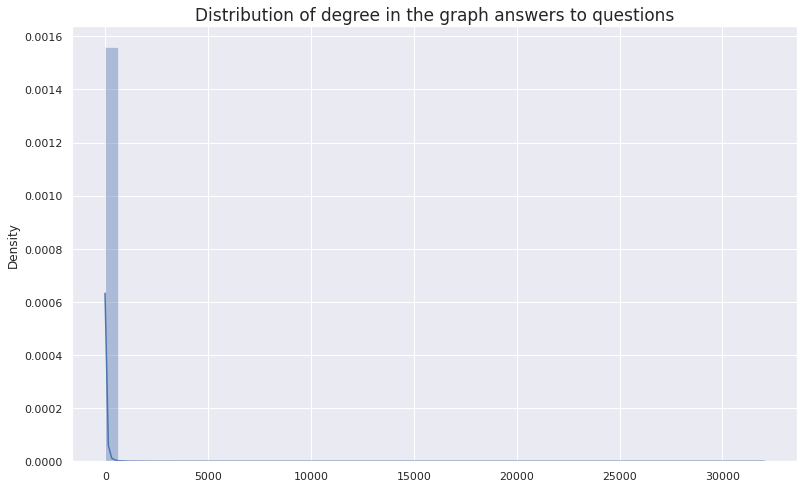

In [ ]:
visualization1(g)

### Visualization 2 - Visualize the best user! 

In this section we would like to focus on a single node/user that can be chosen from the user. In particular we want to measure the importance that this node has in the whole graph. 

We can do that with some different measures:
1. PageRank
2. Betweeness 
3. Closeness Centrality 
4. Degree Centrality


Moreover also the type of measure can be chosen from the user.

The output is composed by two parts. 
In the first one we are dealing with a initial graph (in this case that is computed on an interval from 01/12/2011 to 05/12/2011) and the network let us get a look at the importance of this input node: it is a subgraph of the *big* initial graph and it shows first level neighborhood of the chosen node. 

In this case the input node is 984393 and we have computed Degree Centrality measure to evaluete its importance in the graph.

Then the second part of the output consists of a time series that shows how this measure of centrality varies over time for this specific node.

The time over which the measure is computed is chosen from the user too.

In this case we are considering the *December 2011* and Degree Centrality is computed each day during this month. In order to get the trend of its importance we have computed this measure based on a graph that regards an increasing time interval:

* 1 day: from 01/12/2011 to 02/12/2011
* 2 days: from 01/12/2011 to 03/12/2011
* 3 days: from 01/12/2011 to 04/12/2011
* ...
* 30 days: from 01/12/2011 to 30/12/2011

We can notice from the graph that the user which is represented from the node 984393 increas his centrality during the first 10 days of the month and later its metric is stable until the end of December. That could mean that his activity was high in the first days and then it stopped. 

Choose a node! 
984393
Choose a metric: 
A: Pagerank 
B: Betweeness 
C: Closeness Centrality
D: Degree Centrality 
D


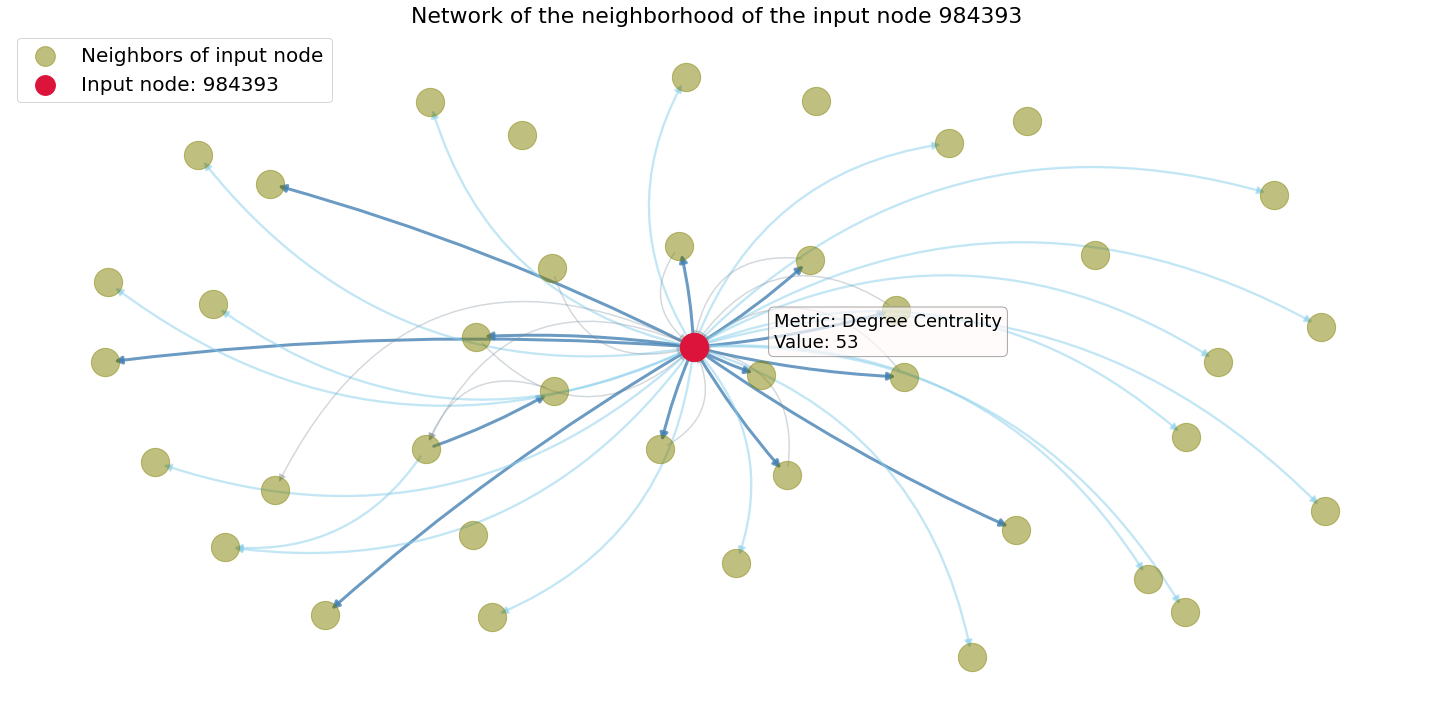

Choose a time interval:
From: 2011-12
To: 2012-01
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:07<00:00, 498235.01it/s]


Fetched in 177.85 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:06<00:00, 503445.52it/s]


Fetched in 177.07 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:06<00:00, 502817.60it/s]


Fetched in 176.71 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:05<00:00, 504086.07it/s]


Fetched in 176.36 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:08<00:00, 495320.34it/s]


Fetched in 178.62 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:08<00:00, 494984.66it/s]


Fetched in 178.73 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:08<00:00, 493483.33it/s]


Fetched in 179.08 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:08<00:00, 492251.66it/s]


Fetched in 179.43 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:08<00:00, 493417.46it/s]


Fetched in 179.25 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:10<00:00, 485873.09it/s]


Fetched in 181.13 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:11<00:00, 484304.57it/s]


Fetched in 181.67 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:11<00:00, 483666.76it/s]


Fetched in 181.74 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:11<00:00, 481964.52it/s]


Fetched in 182.26 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:12<00:00, 479494.42it/s]


Fetched in 182.95 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:13<00:00, 477418.60it/s]


Fetched in 183.53 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:13<00:00, 476375.82it/s]


Fetched in 183.85 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:13<00:00, 475262.47it/s]


Fetched in 184.21 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:14<00:00, 473080.16it/s]


Fetched in 184.81 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:14<00:00, 471151.19it/s]


Fetched in 185.41 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:15<00:00, 469873.48it/s]


Fetched in 185.80 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:17<00:00, 460659.65it/s]


Fetched in 188.49 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:18<00:00, 459467.90it/s]


Fetched in 188.85 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:18<00:00, 458410.53it/s]


Fetched in 189.17 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:19<00:00, 456166.15it/s]


Fetched in 189.88 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:19<00:00, 454551.87it/s]


Fetched in 190.42 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:19<00:00, 455071.33it/s]


Fetched in 190.25 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:19<00:00, 453981.54it/s]


Fetched in 190.57 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:21<00:00, 449812.15it/s]


Fetched in 192.03 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:22<00:00, 445637.50it/s]


Fetched in 193.24 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:22<00:00, 444296.22it/s]


Fetched in 193.66 seconds.


In [ ]:
metric_series, date_list, chosen_node, m = visualization2(g.my_graph, list_of_graphs)

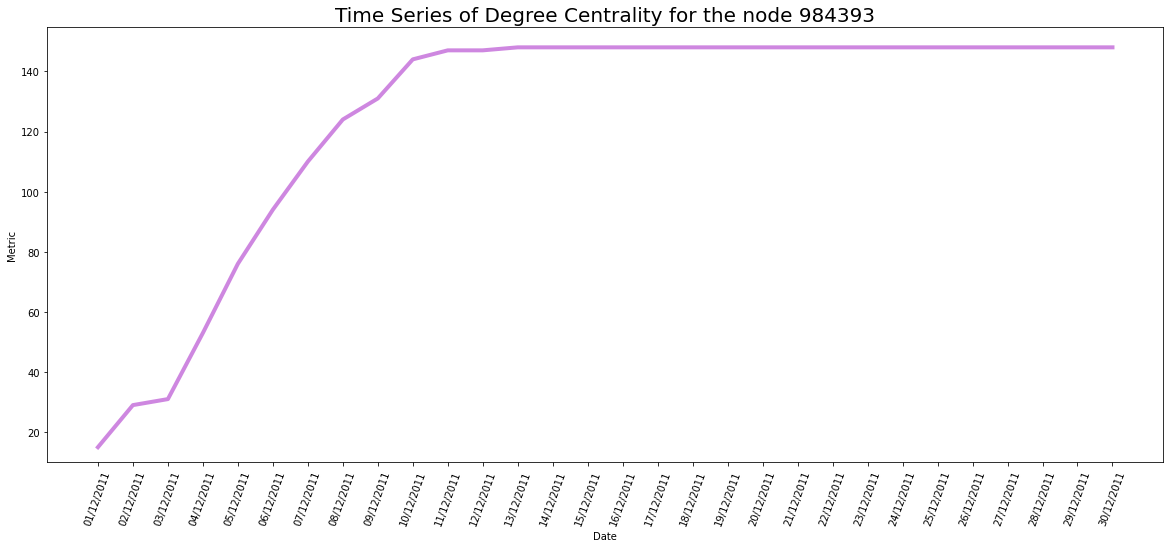

In [ ]:
plot_time_series(metric_series, date_list, chosen_node, m)

### Visualization 3 - Visualize the Shortest Ordered Route 

In this section we are interested to see which is the shortest way to go from a user to another one. This is a *(weighted) minimum path problem*!.


We are going to visualize the shortest path between twe nodes/users chosen by the user (in this case they are 663368 and 908515). Moreover this path must pass through some other nodes/users chosen by the user (in this case they are 738746 319749 522444).

The output is composed by two (almost) equivalent network. 

The first one contains a subgraph of the original graph in which path from the red start node 663368 to the blue end node 908515 is highlighted in yellow. 
As we can see better from the the seconnd network the yellow path passes through green node and some other lightblue nodes that are necessary to go from $p_1$ to $p_n$. 

The shortest path is equal to almost 5.

Choose the starting node:  663368
Choose the end node:  908515
Choose the nodes to pass through:   738746 319749 522444
Node 663368 to 738746, shortest distance: 1.203212460250055, time: 127.78 secs
Node 738746 to 319749, shortest distance: 1.5236700950911444, time: 139.42 secs
Node 319749 to 522444, shortest distance: 1.3385477434866675, time: 126.95 secs
Node 522444 to 908515, shortest distance: 1.0204553706830892, time: 128.35 secs


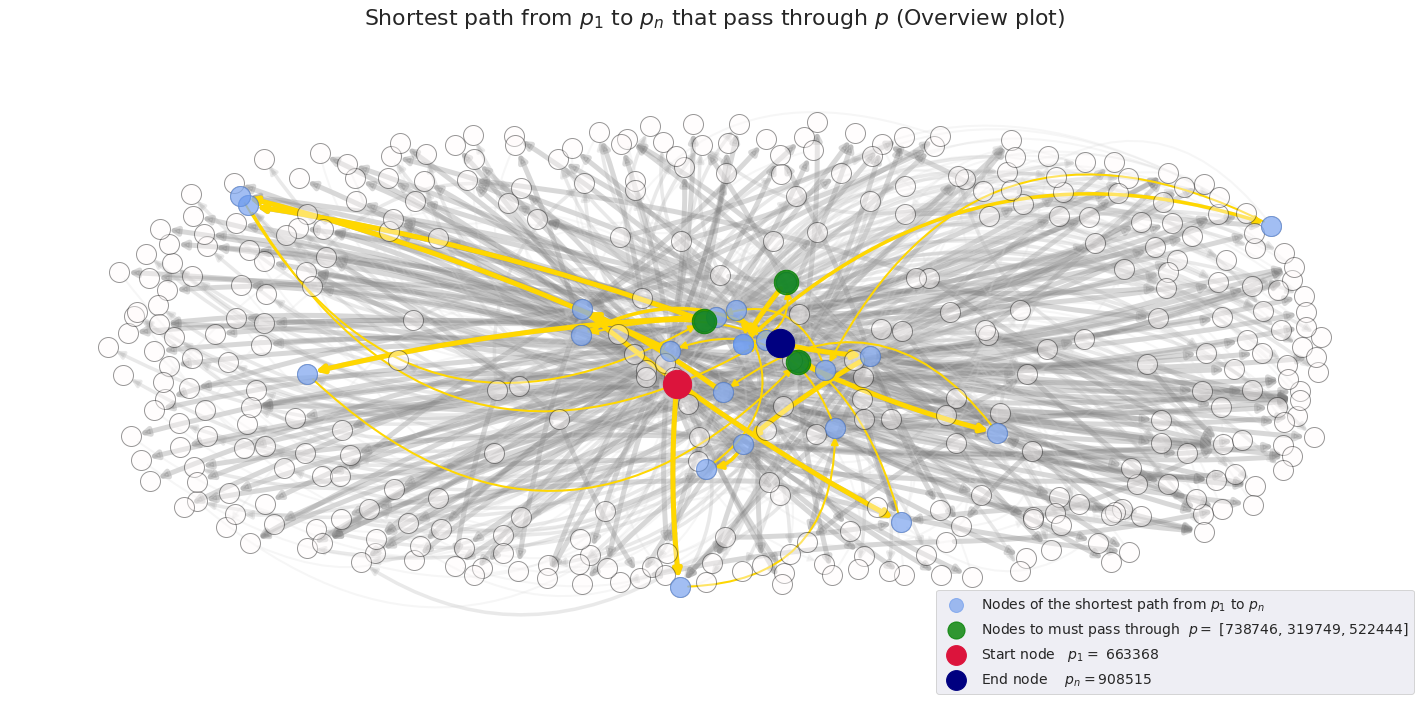

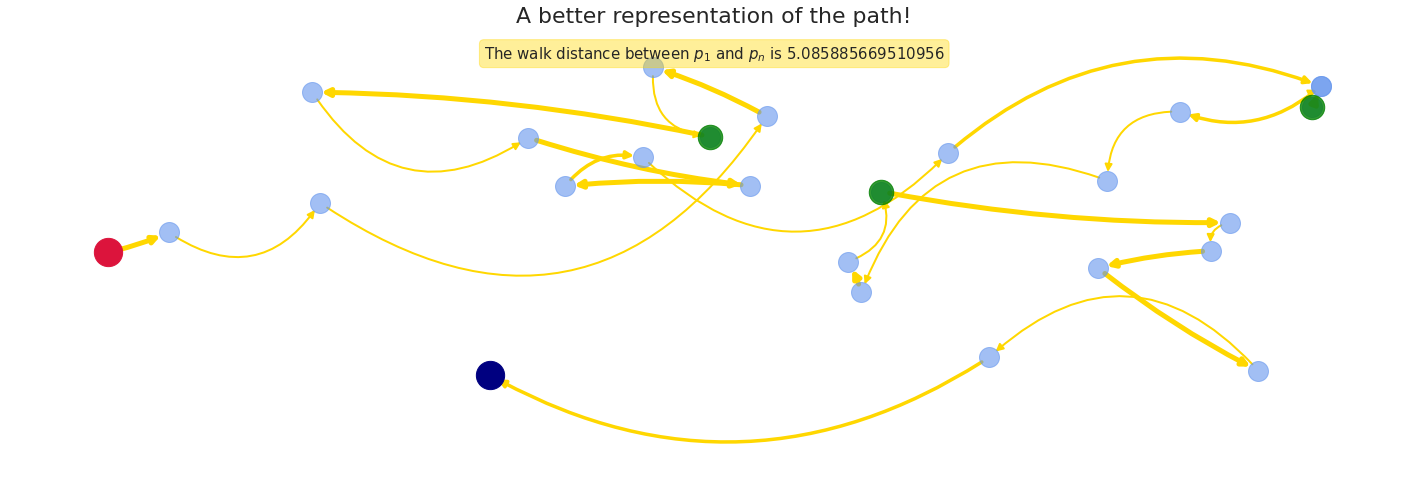

In [ ]:
visualization3(g.my_graph)

### Visualization 4 - Visualize disconnecting graphs 

In this last section we are interested in disconnecting to users with the removal of the minimum number of edges. 
In particular this two users come from two differen graph which are computed in two different time intervals that can be chosen by the user. 

In this case the user picks:
1. from 01/12/2011 to 05/12/2011
2. from 06/12/2011 to 11/12/2011

However, in this case, we can't let the user to choose two generic nodes to be disconnected since they must be unique to each interval of time. 
Thus, these two nodes are chosen randomly among all possible suitable unique nodes.

The visualization contains a network with first and second level neighbors of two nodes in order to have a great idea of the graph around them. In the plot there are highlighted in pink the edges that has to be cut to disconnect the first node (blue) from the second one (green).

In this case the two nodes are 1079790 and 893062 and we need to cut three edges to disconnect them.


Choose a time interval:
From: 01/12/2011
To: 05/12/2011
Choose a time interval:
From: 06/12/2011
To: 11/12/2011

The first graph deals with the time interval from 01/12/2011 to 05/12/2011
The second graph deals with the time interval from 06/12/2011 to 11/12/2011

Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:05<00:00, 505314.13it/s]


Fetched in 153.34 seconds.
Fetching timestamp.csv...
Creating graph!


100%|██████████| 63497051/63497051 [02:04<00:00, 511644.93it/s]


Fetched in 146.35 seconds.

The nodes to be disconnected are 1079790 and 893062.


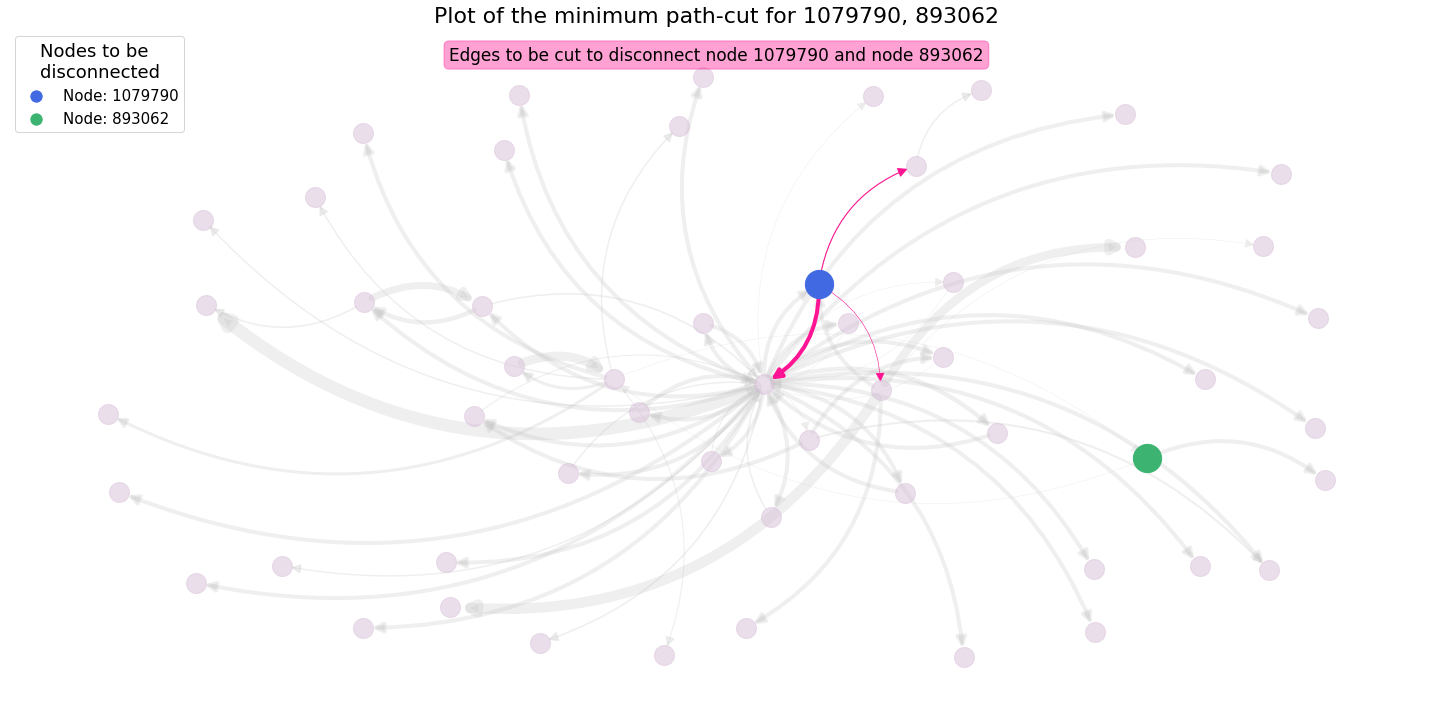

In [ ]:
visualization4(list_of_graphs)

## 4. Algorithmic question

In the algorithm we have implemented there are two "for" loops in "pairs", and we denote the length of "pairs" with _k_. Then there is a "for" loop in "kids", and we denote the length of "kids" with _n_. Therefore, since the "for" loops are not nested, we have that the running time of the algorithm is _O_(_n_ + 2 _k_). So we can conclude that the algorithm is linear in _n_ and in _k_.

In [ ]:
def list_of_dorms(kids, pairs):
    # INPUT:
    # kids -> list of kids
    # pairs -> list of pair sof kids with fights
    
    # These are the lists of the two dorms
    dorm1 = []
    dorm2 = []
    
    # I create a list with which I keep track of the kids already visited
    visited = []
    
    # I start separating the pairs
    for pair in pairs: 
        
        # If the kid "pair[0]" has not yet been visited
        if (pair[0] not in visited):
            # I check if the other kid of the pair (that is "pair[1]") is already in "dorm1"
            # If "pair[1]" is not in "dorm1", then I visit "pair[0]" and I add it to "dorm1"
            if (pair[1] not in dorm1):
                visited.append(pair[0])
                dorm1.append(pair[0])
            # Otherwise, I visit "pair[0]" and I add it to "dorm2"
            else:
                visited.append(pair[0])
                dorm2.append(pair[0])
                
        # Then I do the same thing for the second kid of the pair, that is "pair[1]"
        # If the kid "pair[1]" has not yet been visited   
        if(pair[1] not in visited):
            # I check if the other kid of the pair (that is "pair[0]") is already in "dorm2"
            # If "pair[0]" is not in "dorm2", then I visit "pair[1]" and I add it to "dorm2"
            if (pair[0] not in dorm2):
                visited.append(pair[1])
                dorm2.append(pair[1])
            # Otherwise, I visit "pair[1]" and I add it to "dorm1"
            else:
                visited.append(pair[1])
                dorm1.append(pair[1])
    
    # Now I check if kids who are in the same pair are in the same dorm
    # If this happens, I block the algorithm and exit
    for pair in pairs:
        if ((pair[0] in dorm1) and (pair[1] in dorm1)) or (pair[0] in dorm2) and (pair[1] in dorm2):
            print("Nothing to do.")
            return 
    
    # Now I add the kids who remained in the dorms
    # Since there are no space limits in the dorms, 
    # I decide to assign all the remaining children to the first dormitory
    for kid in kids:
        if (kid not in dorm1) and (kid not in dorm2):
            dorm1.append(kid)
    
    # At the end I print the lists of the two dorms
    print("Solution found! Here the list of dorms:")
    print("First dormitory:", dorm1)
    print("Second dormitory:",dorm2)

##### Example 1

In [ ]:
kids = [1,2,3,4,5,6]
pairs = [(5,4), (6,5), (2,6)]
list_of_dorms(kids, pairs)

Solution found! Here the list of dorms:
First dormitory: [5, 2, 1, 3]
Second dormitory: [4, 6]


##### Example 2

In [ ]:
kids = [1,2,3,4,5,6]
pairs = [(1,2), (3,2), (3,1)]
list_of_dorms(kids, pairs)

Nothing to do.


##### Example 3

In [ ]:
kids = [1,2,3,4,5,6]
pairs = [(1,3), (4,3)]
list_of_dorms(kids, pairs)

Solution found! Here the list of dorms:
First dormitory: [1, 4, 2, 5, 6]
Second dormitory: [3]


##### Example 4

In [ ]:
n = [4,2,1,3,5,6]
k = [(1,2), (3,2), (3,1)]
list_of_dorms(n,k)

Nothing to do.


##### Example 5

In [ ]:
kids = ['Anthony', 'Luke', 'Emily', 'John', 'Mary', 'Sophie']
pairs = [('Anthony', 'Mary'), ('Emily', 'John')]
list_of_dorms(kids, pairs)

Solution found! Here the list of dorms:
First dormitory: ['Anthony', 'Emily', 'Luke', 'Sophie']
Second dormitory: ['Mary', 'John']


##### Example 6

In [ ]:
kids = ['Anthony', 'Luke', 'Emily', 'John', 'Mary', 'Sophie']
pairs = [('Anthony', 'Emily'), ('John', 'Emily')]
list_of_dorms(kids, pairs)

Solution found! Here the list of dorms:
First dormitory: ['Anthony', 'John', 'Luke', 'Mary', 'Sophie']
Second dormitory: ['Emily']


##### Example 7

In [ ]:
kids = ['Anthony', 'Luke', 'Emily', 'John', 'Mary', 'Sophie']
pairs = [('Anthony', 'Mary'), ('Anthony', 'John'), ('Mary', 'John')]
list_of_dorms(kids, pairs)

Nothing to do.
